In [376]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [377]:
sample = 200

In [378]:
## data1 ##
np.random.seed(11)
X1 = np.random.rand(sample, 1) 
X2 = np.random.rand(sample, 1) 
y = X1 * X2
# y = np.where(y >= 0.197, 0, 1)
y = np.where(y >= 0.5, 0, 1)

X1_df = pd.DataFrame(X1, columns=['X1'])
X2_df = pd.DataFrame(X2, columns=['X2'])
y_df = pd.DataFrame(y, columns=['y'])

X = pd.concat([X1_df, X2_df], axis=1)
D_X1 = pd.concat([X1_df, y_df], axis=1)
D_X2 = pd.concat([X2_df, y_df], axis=1)

In [379]:
Display_y = pd.DataFrame(y, columns=['y'])
Display_y.value_counts()

y
1    172
0     28
Name: count, dtype: int64

Text(0.5, 1.0, 'Data 1')

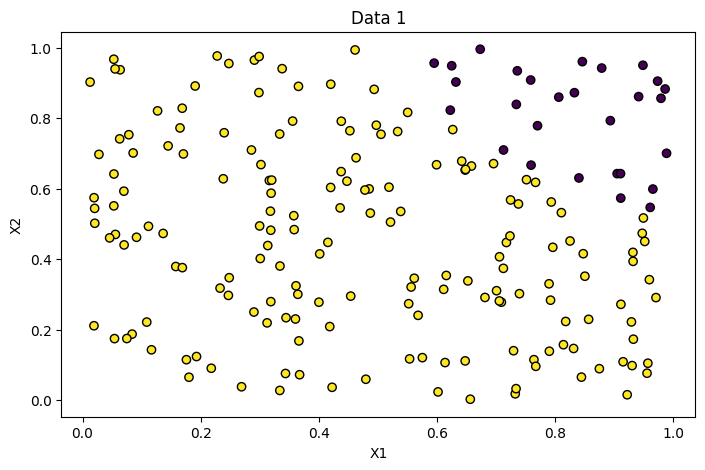

In [380]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.scatter(X1, X2, c=y.flatten(), cmap='viridis', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data 1')

In [381]:
PX1C0 = D_X1[D_X1['y'] == 0].drop(columns=['y']) # ['P(X1|C0)']
PX2C0 = D_X2[D_X2['y'] == 0]                     # ['P(X2|C0)']
PX1C1 = D_X1[D_X1['y'] == 1].drop(columns=['y']) # ['P(X1|C1)']
PX2C1 = D_X2[D_X2['y'] == 1]                     # ['P(X2|C1)']

Disp_PX1C0 = pd.DataFrame(PX1C0)
Disp_PX2C0 = pd.DataFrame(PX2C0)
Disp_PX1C1 = pd.DataFrame(PX1C1)
Disp_PX2C1 = pd.DataFrame(PX2C1)


In [382]:
Disp_C0 = pd.concat([Disp_PX1C0, Disp_PX2C0], axis=1)
Disp_C0[:5]

,X1,X2,y
8,0.941807,0.861393,0
12,0.893904,0.793282,0
15,0.632334,0.902837,0
20,0.758980,0.908448,0
35,0.949102,0.950411,0


In [383]:
Disp_C1 = pd.concat([Disp_PX1C1, Disp_PX2C1], axis=1)
Disp_C1[:5]

,X1,X2,y
0,0.180270,0.065447,1
1,0.019475,0.574656,1
2,0.463219,0.687936,1
3,0.724934,0.568306,1
4,0.420204,0.603727,1


# ((X1|C0) / C0) * ((X2|C0) / C0) * C0
# ((X1|C1) / C1) * ((X2|C1) / C1) * C1

In [384]:
def Bay(X1, X2, y, Class0, Class1):
    
    X1 = pd.DataFrame(X1, columns=['X1'])
    X2 = pd.DataFrame(X2, columns=['X2'])
    y = pd.DataFrame(y, columns=['y'])

    D_X1 = pd.concat([X1, y], axis=1)
    D_X2 = pd.concat([X2, y], axis=1)

    C0 = len(y[y['y'] == Class0])
    C1 = len(y[y['y'] == Class1])

    print("Class 0 :", C0)
    print("Class 1 :", C1)

    PX1C0 = D_X1[D_X1['y'] == Class0].drop(columns=['y']) # ['P(X1|C0)']
    PX2C0 = D_X2[D_X2['y'] == Class0].drop(columns=['y']) # ['P(X2|C0)']
    PX1C1 = D_X1[D_X1['y'] == Class1].drop(columns=['y']) # ['P(X1|C1)']
    PX2C1 = D_X2[D_X2['y'] == Class1].drop(columns=['y']) # ['P(X2|C1)']

    Mean_X1C0 = np.mean(PX1C0)
    Mean_X2C0 = np.mean(PX2C0)
    Mean_X1C1 = np.mean(PX1C1)
    Mean_X2C1 = np.mean(PX2C1)

    print("Mean X1|C0 :", Mean_X1C0)
    print("Mean X2|C0 :", Mean_X2C0)
    print("Mean X1|C1 :", Mean_X1C1)
    print("Mean X2|C1 :", Mean_X2C1)
    
    StanDe_X1C0 = np.sqrt(np.sum((PX1C0.values - Mean_X1C0)**2) / (C0 - 1))
    StanDe_X2C0 = np.sqrt(np.sum((PX2C0.values - Mean_X2C0)**2) / (C0 - 1))
    StanDe_X1C1 = np.sqrt(np.sum((PX1C1.values - Mean_X1C1)**2) / (C1 - 1))
    StanDe_X2C1 = np.sqrt(np.sum((PX2C1.values - Mean_X2C1)**2) / (C1 - 1))
    
    print("Standard Deviation X1|C0 :", (StanDe_X1C0))
    print("Standard Deviation X2|C0 :", (StanDe_X2C0))
    print("Standard Deviation X1|C1 :", (StanDe_X1C1))
    print("Standard Deviation X2|C1 :", (StanDe_X2C1))

    return (PX1C0, PX2C0, Mean_X1C0, Mean_X2C0, StanDe_X1C0, StanDe_X2C0,
            PX1C1, PX2C1, Mean_X1C1, Mean_X2C1, StanDe_X1C1, StanDe_X2C1)

def Func(PX_C_, Mean_X_C_, StanDe_X_C_):
    
    pi = 3.14159265359
    power = -((PX_C_ - Mean_X_C_)**2 / 2*StanDe_X_C_**2)
    Pos = (1 /  np.sqrt(2*pi*StanDe_X_C_**2)) * np.exp(power)
    
    return Pos
    

In [385]:
PX1C0, PX2C0, Mean_X1C0, Mean_X2C0, StanDe_X1C0, StanDe_X2C0,\
PX1C1, PX2C1, Mean_X1C1, Mean_X2C1, StanDe_X1C1, StanDe_X2C1 = Bay(X1, X2, y, 0, 1)

Class 0 : 28
Class 1 : 172
Mean X1|C0 : 0.82850472778937
Mean X2|C0 : 0.8102705872874474
Mean X1|C1 : 0.46673099564574316
Mean X2|C1 : 0.447178437955875
Standard Deviation X1|C0 : 0.12623106589377103
Standard Deviation X2|C0 : 0.13564188088129245
Standard Deviation X1|C1 : 0.27948427946994253
Standard Deviation X2|C1 : 0.26643750214943923


In [386]:
likelihood_C0_X1 = Func(PX1C0, Mean_X1C0, StanDe_X1C0)
likelihood_C0_X2 = Func(PX2C0, Mean_X2C0, StanDe_X2C0)
likelihood_C1_X1 = Func(PX1C1, Mean_X1C1, StanDe_X1C1)
likelihood_C1_X2 = Func(PX2C1, Mean_X2C1, StanDe_X2C1)


print(likelihood_C0_X1[:5])
print(likelihood_C0_X2[:5])
print(likelihood_C1_X1[:5])
print(likelihood_C1_X2[:5])

          X1
8   3.160090
12  3.160305
15  3.159444
20  3.160291
35  3.160047
          X2
8   2.941073
12  2.941136
15  2.940912
20  2.940883
35  2.940612
         X1
0  1.422856
1  1.416315
2  1.427422
3  1.423711
4  1.427302
         X2
0  1.489596
1  1.496457
2  1.494243
3  1.496541
4  1.496018


In [387]:
PostC0 = (likelihood_C0_X1.values * likelihood_C0_X2.values) * (100 / 200)
PostC1 = (likelihood_C1_X1.values * likelihood_C1_X2.values) * (100 / 200)
len(PostC0)

28

Text(0.5, 1.0, 'X2')

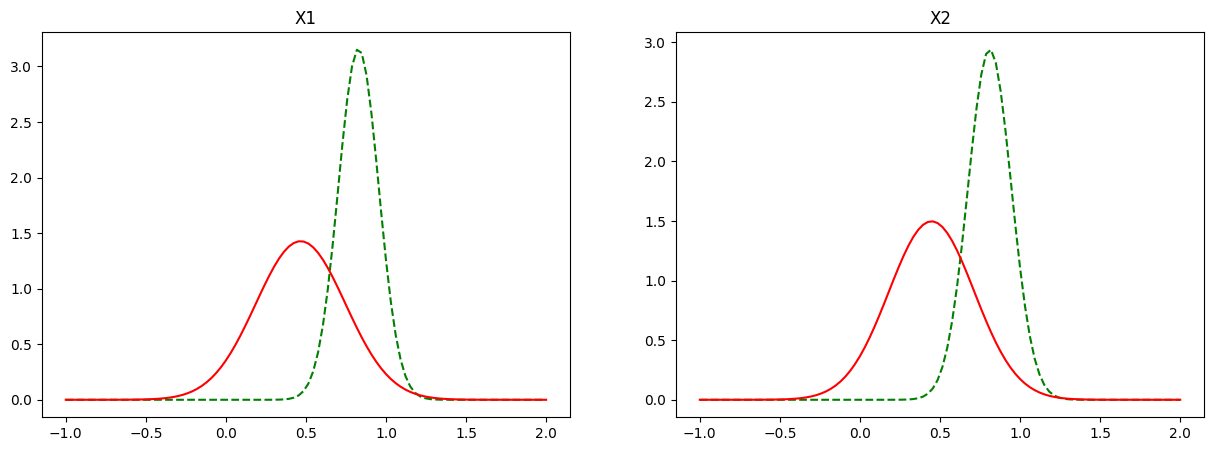

In [388]:
from scipy.stats import norm

line = np.linspace(-1, 2, 100)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(line, norm.pdf(line, Mean_X1C0, StanDe_X1C0), 'g--')
plt.plot(line, norm.pdf(line, Mean_X1C1, StanDe_X1C1), 'r-')
plt.title("X1")

plt.subplot(1,2,2)
plt.plot(line, norm.pdf(line, Mean_X2C0, StanDe_X2C0), 'g--')
plt.plot(line, norm.pdf(line, Mean_X2C1, StanDe_X2C1), 'r-')
plt.title("X2")

Text(0.5, 1.0, 'X2')

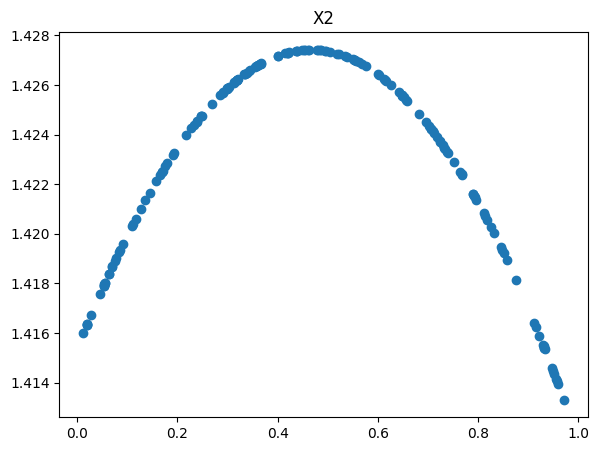

In [389]:
plt.figure(figsize=(15,5))

t = np.arange(0,100)

plt.subplot(1,2,2)
plt.scatter(PX1C0, likelihood_C0_X1)
plt.scatter(PX1C1, likelihood_C1_X1)
plt.title("X2")